# ¿Quiénes asisten? Explorando la participación estudiantil de un programa educativo realizado en tres colegios de la ciudad de Medellín.

Este proyecto analiza la asistencia de estudiantes de grado sexto a undécimo que participaron en un proyecto educativo realizado en tres instituciones educativas de la ciudad de Medellín. Los estudiantes, dependiendo de su grado vivenciaron algunos los talleres de desarrollo de software, nuevas tecnologías y modelado de materiales distribuidos en 4 sesiones. Teniendo en cuenta lo anterior, a partir de las asistencias recolectadas durante las experiencias se aplicarán técnicas de análisis de datos y Machine Learning para identificar patrones de asistencia y predecir qué estudiantes tienen mayor probabilidad de participar en todos los encuentros de la experiencia propuesta.

# 1. Limpieza y transformación de datos

In [1]:
#Importando librerías necesarias:
# pandas: para cargar, manipular y analizar los datos en forma de tablas (dataframes).
# numpy: para realizar cálculos numéricos y operaciones matemáticas.
# datetime: para trabajar con fechas y horas.

import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQk0rzY9e0qLlNDYrcu_6pldyymoQk8qQP9tgZPNvgqH88dIS_tCcmfwF2r2k7316EdbS0xy_r4uDR-/pub?gid=712651355&single=true&output=csv')
df2=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQjN63F2a7uYNFLQ2s1dHJOTLQ7-FU-ybIT4dnSthjDYdE8v43jmlABSgQBn3ehc9JAKJAl7MhfcqT2/pub?gid=871434711&single=true&output=csv')

# Filtrado de datos: se conservan únicamente las columnas que no están relacionadas con información personal sensible del estudiante.
df1 = df1[['Fecha evento','N° de Documento','Genero','Fecha de Nacimiento','Grado','Asistencia']].copy()
df2 = df2[['Fecha evento','N° de Documento','Genero','Fecha de Nacimiento','Grado','Asistencia']].copy()

In [3]:
# Combinando ambos dataframes en uno solo.
df=pd.concat([df1,df2], ignore_index=True)
df.head()

,Fecha evento,N° de Documento,Genero,Fecha de Nacimiento,Grado,Asistencia
0,25/4/2022,1034920269,M,04/02/2008,7-2,NO
1,25/4/2022,1011396343,M,05/09/2007,7-2,NO
2,25/4/2022,1032018095,F,07/07/2009,7-2,SI
3,25/4/2022,1020225405,F,08/07/2009,7-2,SI
4,25/4/2022,1032014849,F,22/10/2008,7-2,SI


## **Descripción completa del proceso de recolección y preparación de datos**

### 1. **Formato y fuente de los datos**
- La información utilizada en este proyecto se recolectó en **dos archivos en formato CSV**.  
- Estos archivos fueron suministrados por la **institución educativa** y contenían los datos necesarios para realizar el análisis.  

### 2. **Datos de los estudiantes**
- Incluían información básica como:  
  - Grado escolar.  
  - Fecha de nacimiento.  
  - Género.  
  - Número de documento (usado inicialmente como identificador técnico).  
- Estos datos sirvieron como base para caracterizar a los estudiantes y construir variables derivadas.

### 3. **Datos de asistencia**
- La asistencia se registró **diariamente durante los talleres**.  
- Los **facilitadores** llamaban a lista y registraban la presencia de cada estudiante con las opciones **“SÍ” (asistió)** o **“NO” (no asistió)**.  
- Posteriormente, esta información se **organizó por fechas de asistencia** hasta obtener un formato consolidado y listo para el análisis.

### 4. **Anonimización de datos personales**
- Para garantizar la **protección de la identidad** de los estudiantes, se aplicó un proceso de **anonimización**.  
- Este proceso consistió en eliminar o transformar cualquier dato que pudiera identificar directamente a una persona.  
- Solo se conservaron las **variables necesarias** para el análisis, que fueron:  
  - Fecha del evento.  
  - Número de documento (usado únicamente como identificador técnico; se eliminará antes del análisis exploratorio).  
  - Género (1 = masculino, 0 = femenino).  
  - Fecha de nacimiento.  
  - Grado.  
  - Asistencia (SÍ / NO).

### 5. **Propósito del filtrado de variables**
- Este filtrado permitió trabajar únicamente con **información esencial**, asegurando:  
  - El cumplimiento de los **objetivos del proyecto de investigación**.  
  - La **confidencialidad** de los estudiantes.  
  - La **protección de los datos sensibles** de la institución educativa.

### 6. **Cálculo y creación de variables derivadas**
- A partir de las variables originales, se calcularon nuevas variables relevantes para el análisis:  
  - **Edad_entero:** edad del estudiante expresada en años completos.  
  - **Es_grado_9_o_superior:** variable binaria (1 si el estudiante cursa grado 9 o superior, 0 en caso contrario).  
  - **Es_mayor_igual_a_15:** variable binaria (1 si el estudiante tiene 15 años o más, 0 en caso contrario).  
  - **Talleres:** codificación del tipo de

### 7. **Resultado final del procesamiento**
- Tras aplicar la limpieza, anonimización y creación de variables, se obtuvo una **base de datos estructurada y depurada**, lista para ser utilizada en el **análisis exploratorio y la modelación predictiva**.


In [4]:
#Se cambia el tipo de dato de las columnas Fecha evento y Fecha de Nacimiento al formato datetime (ejemplo: 2022-04-25)
#con el fin de unificar el tipo y el formato de las fechas en todo el conjunto de datos y facilitar su análisis.
df['Fecha evento']=pd.to_datetime(df['Fecha evento'])
df['Fecha de Nacimiento']=pd.to_datetime(df['Fecha de Nacimiento'],format="mixed")

#Calculando la edad que tenían los estudiantes durante el proyecto
df['Edad']=df['Fecha evento'].dt.year-df['Fecha de Nacimiento'].dt.year

#Añade a los grado de 6, 7 y 8 modelado de materiales
def conditions(x):
    if   x == '10-2':   return "Tvirtuales"
    elif x =='10-3':   return "Tvirtuales"
    elif x =='10-4':   return "Tvirtuales"
    elif x =='10-5':   return "Tvirtuales"
    elif x =='10-6':   return "Tvirtuales"
    elif x =='10-7':   return "Tvirtuales"
    elif x=='6-1':     return 'Modelado de Materiales'
    elif x=='6-2':     return 'Modelado de Materiales'
    elif x=='7-1':     return 'Modelado de Materiales'
    elif x=='7-2':     return 'Modelado de Materiales'
    elif x=='7-3':     return 'Modelado de Materiales'
    elif x=='8':     return 'Modelado de Materiales'
    elif x=='8-1':     return 'Modelado de Materiales'
    elif x=='8-3':     return 'Modelado de Materiales'
    else:           return "Software"

func         = np.vectorize(conditions)
Talleres = func(df["Grado"])

df["Talleres"] = Talleres

#encode talleres

df['Talleres'] = df['Talleres'].map({'Software': 0, 'Tvirtuales': 1, 'Modelado de Materiales': 2})

# Calculando nuevas variables: si los estudiantes están en grado 9 o superior y si tienen 15 años o más.

# Función para verificar si el grado es 9 o superior
def is_grade_9_or_higher(grado):
    try:
        grade_num = int(grado.split('-')[0])
        return grade_num >= 9
    except:
        return False  # Handle cases where the format might be different

#Eliminar grado 8-2 tiene pocos valores
df = df[df['Grado'] != '8-2']

# Creación de la columna es 'Es_grado_9_o_superior'
df['Es_grado_9_o_superior'] = df['Grado'].apply(is_grade_9_or_higher)

# Creacion de la columna'Es_mayor_o_igual_15'
df['Es_mayor_o_igual_15'] = df['Edad'] >= 15

#Creando nueva columna número_sesión para saber a cuales sesiones los estudiantes fueron
#se cuenta el número de documento para saber cuantas veces aparece el estudiante y asignarle un número de 1 a 4
df["numero_sesion"] = df.groupby('N° de Documento').cumcount() + 1

# Eliminar filas donde 'numero_sesion' sea 5, 6, 7 u 8
df = df.drop(df[df['numero_sesion'].isin([5, 6, 7, 8])].index)

df = df.drop(df[df['Edad'].isin([1,2])].index)

# Cambiando 'F' por 0 y  'M' por 1
df['Genero'] = df['Genero'].map({'F': 0, 'M': 1})

#Cambiando 'SI' por 1 y 'No' por 0
df['Asistencia'] = df['Asistencia'].map({'NO': 0, 'SI': 1})

# Ordenar los datos por estudiante y número de sesión
df = df.sort_values(by=["N° de Documento", "numero_sesion"])

# Calcular asistencia previa (sesión anterior)
df["asistencia_previa"] = df.groupby("N° de Documento")["Asistencia"].shift(1)

# Calcular asistencia siguiente (sesión posterior)
#df["asistencia_siguiente"] = df.groupby("N° de Documento")["Asistencia"].shift(-1)

# Calcular promedio de asistencia anterior por estudiante hasta esa sesión
df["promedio_asistencia_prev"] = (
    df.groupby("N° de Documento")["Asistencia"]
    .apply(lambda x: x.shift().expanding().mean())
    .reset_index(level=0, drop=True)
)

#df['acumulado_sesiones'] = df.groupby('N° de Documento').cumcount() + 1

#Convertir a entero

df['Es_grado_9_o_superior']=df['Es_grado_9_o_superior'].astype(int)
df['Es_mayor_o_igual_15']=df['Es_mayor_o_igual_15'].astype(int)

# Count the occurrences of each document number
document_counts = df['N° de Documento'].value_counts()

# Filter to get the document numbers that appear exactly 4 times
documentos_4_veces = document_counts[document_counts == 4].index.tolist()

# Filter the original DataFrame to keep only those document numbers
df = df[df['N° de Documento'].isin(documentos_4_veces)].copy()

# Display the first few rows of the filtered DataFrame to verify
display(df.head())

/tmp/ipython-input-4116682384.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha evento']=pd.to_datetime(df['Fecha evento'])


,Fecha evento,N° de Documento,Genero,Fecha de Nacimiento,Grado,Asistencia,Edad,Talleres,Es_grado_9_o_superior,Es_mayor_o_igual_15,numero_sesion,asistencia_previa,promedio_asistencia_prev
2045,2023-03-22,1011393079,1,2005-07-21,11-2,1,18,0,1,1,1,NaN,NaN
2373,2023-04-25,1011393079,1,2005-07-21,11-2,1,18,0,1,1,2,1.0,1.0
2701,2023-05-16,1011393079,1,2005-07-21,11-2,1,18,0,1,1,3,1.0,1.0
3029,2023-06-05,1011393079,1,2005-07-21,11-2,1,18,0,1,1,4,1.0,1.0
2124,2023-03-30,1011393218,0,2005-08-19,11-6,1,18,0,1,1,1,NaN,NaN


## **¿Cuantos estudiantes participaron?**

In [5]:
#Contar valores únicos
a=df['N° de Documento'].unique()
a.shape

(778,)

**Nota** : El número de estudiantes que se expera que asista por encuentro es de **778** estudiantes. Es decir que se espera una participacion de estudiantes por los cuatro encuentros de **3112** asistencias.

In [6]:
df.drop(columns=['N° de Documento','Fecha evento','Fecha de Nacimiento'], inplace=True)

In [7]:
df.head()

,Genero,Grado,Asistencia,Edad,Talleres,Es_grado_9_o_superior,Es_mayor_o_igual_15,numero_sesion,asistencia_previa,promedio_asistencia_prev
2045,1,11-2,1,18,0,1,1,1,NaN,NaN
2373,1,11-2,1,18,0,1,1,2,1.0,1.0
2701,1,11-2,1,18,0,1,1,3,1.0,1.0
3029,1,11-2,1,18,0,1,1,4,1.0,1.0
2124,0,11-6,1,18,0,1,1,1,NaN,NaN


# 2. Resumen estadístico y Visualización de datos

In [8]:
df.describe()

,Genero,Asistencia,Edad,Talleres,Es_grado_9_o_superior,Es_mayor_o_igual_15,numero_sesion,asistencia_previa,promedio_asistencia_prev
count,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,2334.000000,2334.000000
mean,0.475578,0.843509,15.241645,0.922879,0.655527,0.705656,2.500000,0.882177,0.905456
std,0.499483,0.363379,1.683612,0.871988,0.475272,0.455821,1.118214,0.322468,0.251370
min,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,14.000000,0.000000,0.000000,0.000000,1.750000,1.000000,1.000000
50%,0.000000,1.000000,15.000000,1.000000,1.000000,1.000000,2.500000,1.000000,1.000000
75%,1.000000,1.000000,16.000000,2.000000,1.000000,1.000000,3.250000,1.000000,1.000000
max,1.000000,1.000000,19.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


Este resumen estadístico nos permite caracterizar de manera general el conjunto de datos analizados:

Los **3112** registros de asistencia corresponden al total de observaciones esperadas a lo largo de los cuatro encuentros desarrollados en los talleres. Esto significa que cada estudiante pudo aparecer más de una vez, ya que se registró su asistencia por sesión. Por tanto, los datos representan oportunidades de asistencia, no estudiantes únicos.

* La **edad** promedio de los participantes fue de **15,2** años, con una dispersión moderada con una **desviación estandar de de 1.6**, lo que indica que la mayoría de los estudiantes se concentró entre los 14 y 16 años, aunque hubo estudiantes desde los 11 hasta los 19 años.

* El promedio general de **asistencia** fue del **84%** lo cual evidencia una participación alta en las sesiones, aunque también sugiere la presencia de algunos casos de inasistencia que aportan variabilidad útil para el análisis predictivo.

* **El 65,5%** de los estudiantes se encontraba en un grado igual o superior a noveno (**Es_grado_9_o_superior**), lo cual podría evidenciar más particpaciónes de este grupo de estudiantes.

* El **70,5%** de los participantes tenía 15 años o más (**Es_mayor_o_igual_15**)	, lo que coincide con la edad de los estudiantes en grados superiores.

* Para los **talleres**, la media fue **0.92** y la desviación estándar de **0.87**, lo que refleja una distribución diversa de asistencia en los diferentes talleres.

* En las variables derivadas del historial de participación, la asistencia previa muestra una media de **0,88**, mientras que el promedio de asistencia previa alcanza **0,91**, lo que sugiere que los estudiantes que asistieron a una sesión tendían a mantener un comportamiento de asistencia constante a lo largo del programa.

## **¿Cuál fue el resgistro de asistencias?**



In [9]:
Asistencias=df['Asistencia'].value_counts()
Asistencias

,count
Asistencia,
1,2625
0,487


Se registraron **2625 asistencias** durante los cuatro encuentros, lo que evidencia una muy buena participacíon en los talleres. **Los 487 inasistencias** indican que un grupo pudo no asistir a uno o más encuetros.

## **¿Cuál fue la sesión con más asistencias?**

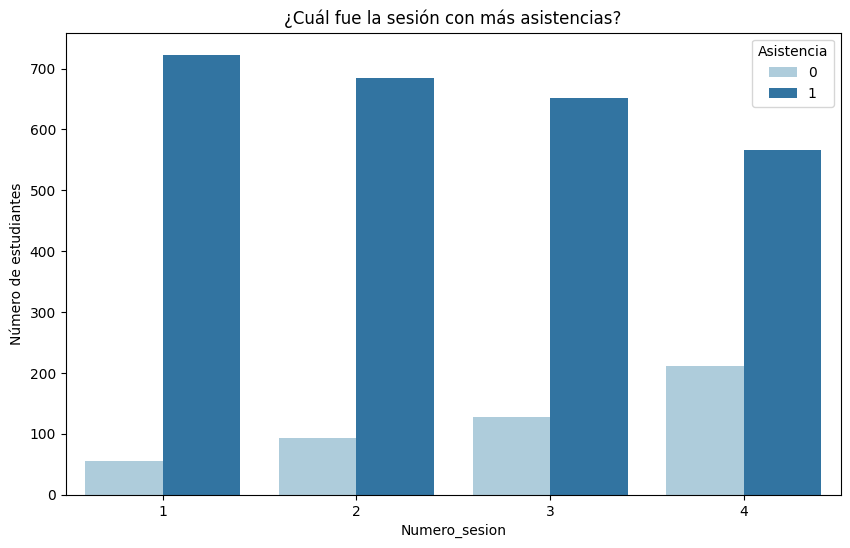

In [10]:
plt.figure(figsize=(10,6));
sns.countplot(data=df, x='numero_sesion', hue='Asistencia',palette='Paired')
plt.title('¿Cuál fue la sesión con más asistencias?')
plt.ylabel('Número de estudiantes')
plt.xlabel('Numero_sesion')
plt.show()

In [11]:
#Sesión con más asistencia
sesiones=pd.crosstab(index=df['Asistencia'],
            columns=df['numero_sesion']).apply(lambda r:(r/len(df))*100)
sesiones

numero_sesion,1,2,3,4
Asistencia,,,,
0,1.767352,2.988432,4.080977,6.812339
1,23.232648,22.011568,20.919023,18.187661


Respondiendo a la pregunta **¿Cuál fue la sesión con más estudiantes?**, observamos que la **primera sesión** concentró la mayor cantidad de asistencias, con un **23.4%** del total, seguida de la segunda sesión con un **22.1**.

Por el contrario, las sesiones **tres y cuatro** fueron las que presentaron mayor número de inasistencias, con **4.2%** y **6.8%** respectivamente.

Esto indica que los estudiantes tuvieron una mayor probabilidad de asistir a las dos primeras sesiones, mientras que la participación disminuyó gradualmente hacia las últimas.

Text(0, 0.5, 'Número de estudiantes')

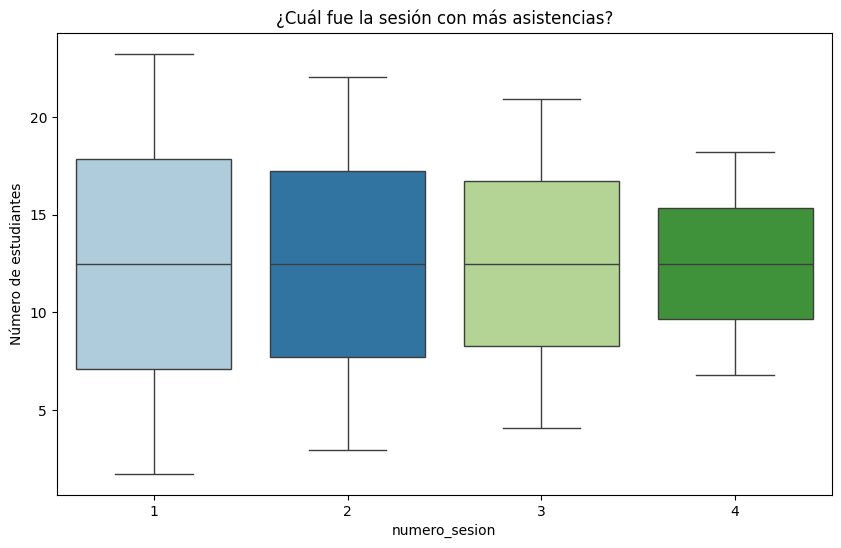

In [12]:
#boxplots por sesiones
plt.figure(figsize=(10,6));
sns.boxplot(sesiones,palette='Paired')
plt.title('¿Cuál fue la sesión con más asistencias?')
plt.ylabel('Número de estudiantes')

**$H_{0}$**: No hay diferencia significativa en el número de sesión entre quienes asisten y quienes no.

**$H_{1}$**: Sí hay diferencia significativa entre ambos grupos.

In [13]:
from scipy.stats import ttest_ind

grupo_1 = df[df["Asistencia"] == 1]["numero_sesion"]
grupo_0 = df[df["Asistencia"] == 0]["numero_sesion"]

t_stat, p = ttest_ind(grupo_1, grupo_0)
print("t-stat:", t_stat)
print("p-value:", p)

t-stat: -11.368386194410355
p-value: 2.2649168522784077e-29


Según la pruba de significanca rechazamos la hpotesis nula, es decir que si hay diferencia significativa entre las diferentes sesiones del programa.

## **¿Asisten por igual Hombres y Mujeres?**

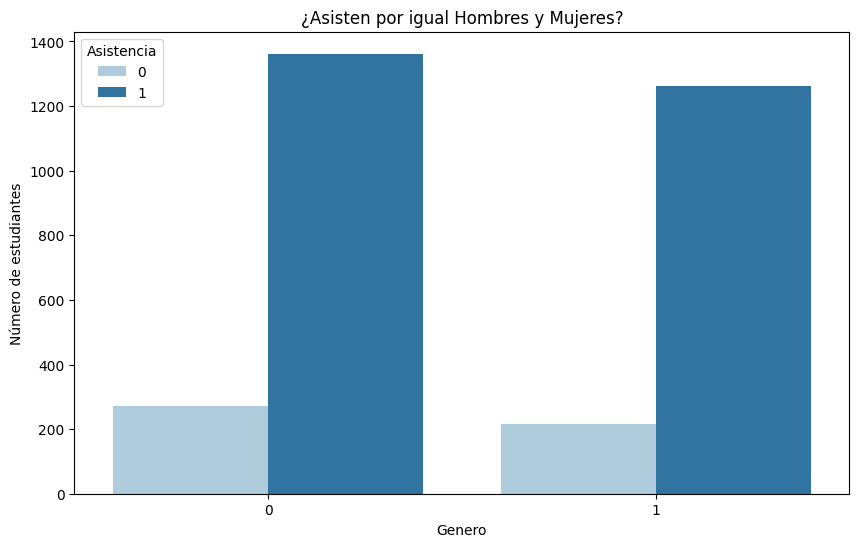

In [14]:
plt.figure(figsize=(10,6));
sns.countplot(data=df ,x='Genero', hue='Asistencia',palette='Paired')
plt.title('¿Asisten por igual Hombres y Mujeres?')
plt.ylabel('Número de estudiantes')
plt.xlabel('Genero')
plt.show()

In [15]:
# ¿Asisten por igual hombres y mujeres
pd.crosstab(index=df['Asistencia'],
            columns=df['Genero'], margins=True)

Genero,0,1,All
Asistencia,,,
0,270,217,487
1,1362,1263,2625
All,1632,1480,3112


Las mujeres fueron las que asitieron más a los talleres con el 43.8% del total y no muy lejos los hombres con el 40% de las asistencias posibles. Esto nos indica que no hubo una diferencia significativa entre ser hombre o mujer en cuanto a la asistencia. Lo que sugiere que el genero no es un factor que haya influido en la participación de los estudiantes.



## **¿Los grados superiores asisten más?**

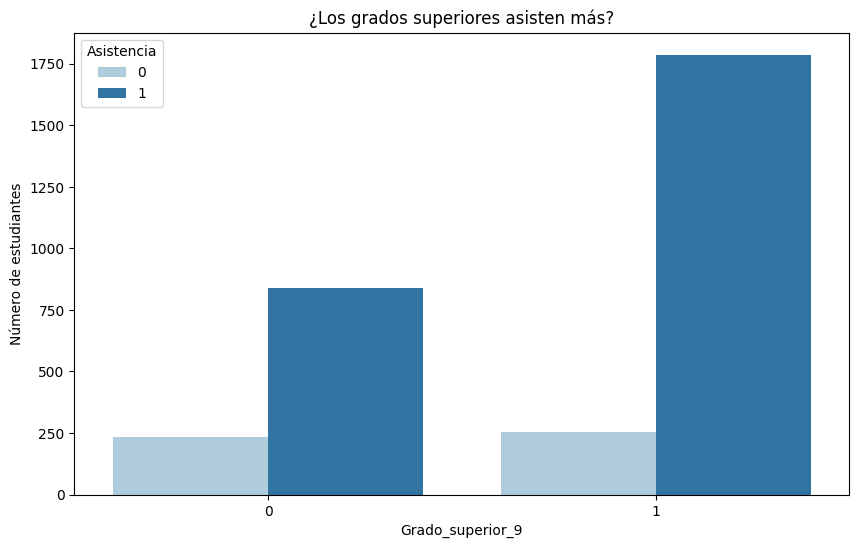

In [16]:
# Asistencia por grado
plt.figure(figsize=(10,6));
plot=sns.countplot(data = df, x = "Es_grado_9_o_superior", hue ='Asistencia', palette='Paired');
plt.title('¿Los grados superiores asisten más?')
plt.ylabel('Número de estudiantes')
plt.xlabel('Grado_superior_9')
plt.show()

In [17]:
# Mostrando la proporción de asistencia por grado superior a 9 o no
pd.crosstab(index=df['Es_grado_9_o_superior'], columns=df['Asistencia'],margins=True)

Asistencia,0,1,All
Es_grado_9_o_superior,,,
0,234,838,1072
1,253,1787,2040
All,487,2625,3112


**¿los grados superiores asisten más?**

Si bien los grados superiores registran la mayor cantidad de asistencias esperadas con 2,040 en total, frente a 1,096 de los grados menores, y además concentran el 56.9% de las asistencias totales frente al 27.3% de los grados inferiores, esto se explica en parte porque representan un grupo más numeroso dentro del total de estudiantes.

Sin embargo, al analizar las tasas de asistencia relativas dentro de cada grupo, se observa que los estudiantes de grados superiores presentan una tasa de asistencia del 87.6%, mientras que los de grados menores alcanzan el 78.2%. Esto sugiere que, aun considerando el tamaño de los grupos, los grados superiores muestran una participación ligeramente más alta y constante, posiblemente asociada a un mayor compromiso o madurez académica.

$H_{0}$: No existe una diferencia significativa en el promedio de la variable Es_grado_9_o_superior entre los estudiantes que asisten y los que no asisten.

In [18]:
from scipy.stats import ttest_ind

grupo_1 = df[df["Asistencia"] == 1]["Es_grado_9_o_superior"]
grupo_0 = df[df["Asistencia"] == 0]["Es_grado_9_o_superior"]

t_stat, p = ttest_ind(grupo_1, grupo_0)
print("t-stat:", t_stat)
print("p-value:", p)

t-stat: 6.928438639509994
p-value: 5.150323138248775e-12


De acuerdo al t-test con $p-value<0,5$ rechazamos la hipotesis nula
es decir si hay una diferencia significativa entre los estudiantes más grandes en cuanto a la asistencia a las experiencias. Lo que indica que esta variable es un factor relavante de asistencia.

## **¿Qué taller tuvo mayor participación?**

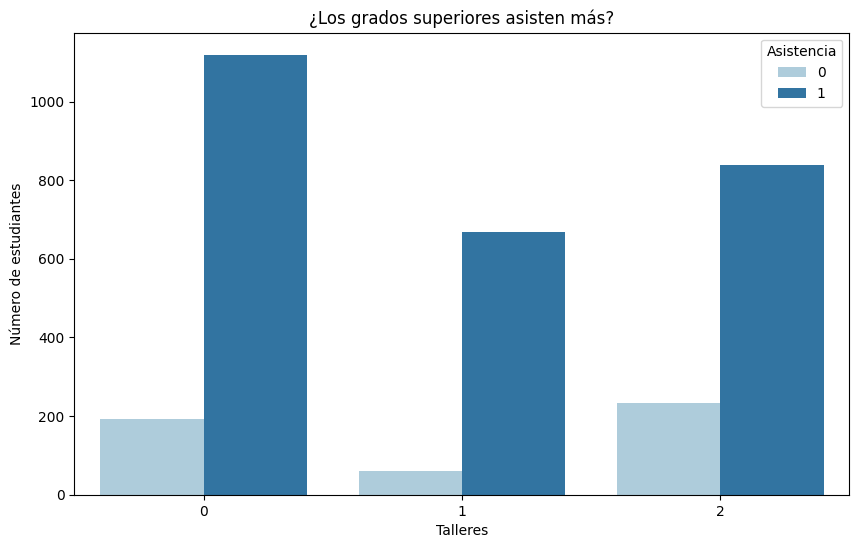

In [19]:
# Asistencia por grado
plt.figure(figsize=(10,6));
plot=sns.countplot(data = df, x = "Talleres", hue ='Asistencia', palette='Paired');
plt.title('¿Los grados superiores asisten más?')
plt.ylabel('Número de estudiantes')
plt.xlabel('Talleres')
plt.show()

In [20]:
# Mostrando la proporción de asistencia por tipo de taller
pd.crosstab(index=df['Talleres'], columns=df['Asistencia'],margins=True)

Asistencia,0,1,All
Talleres,,,
0,193,1119,1312
1,60,668,728
2,234,838,1072
All,487,2625,3112


$H_{0}$: No existe diferencia significativa entre los estudiantes que asisten a los diferentes tipos de talleres.

In [21]:
from scipy.stats import ttest_ind

grupo_1 = df[df["Asistencia"] == 1]["Talleres"]
grupo_0 = df[df["Asistencia"] == 0]["Talleres"]

t_stat, p = ttest_ind(grupo_1, grupo_0)
print("t-stat:", t_stat)
print("p-value:", p)



t-stat: -4.4584431319846445
p-value: 8.547692230873217e-06


De acuerdo al t-test con  $p-value<0.5$ se rechaza la hipotesis nula, es decir si hay una diferencia significativa entre el tipo de taller en la asistencia de los estudiantes.El taller con más asistencia fue desarrollo de software con 1119 asistencias de 1312 posibles. Pero si comparamos los porcentajes relativos al total, el taller con mejor asistencia fue nuevas tecnologías con una asistencia del **91%**, mayor que el de tecnología en desarrollo de software con el **85%**



## **Matriz de correlación**

In [22]:
# Crear matriz de correlación
correlation_matrix = df.corr(numeric_only=True)
round(correlation_matrix,2)

,Genero,Asistencia,Edad,Talleres,Es_grado_9_o_superior,Es_mayor_o_igual_15,numero_sesion,asistencia_previa,promedio_asistencia_prev
Genero,1.00,0.03,-0.01,0.00,-0.04,-0.03,-0.00,0.02,0.01
Asistencia,0.03,1.00,0.08,-0.08,0.12,0.07,-0.20,0.39,0.41
Edad,-0.01,0.08,1.00,-0.66,0.70,0.82,0.00,0.04,0.05
Talleres,0.00,-0.08,-0.66,1.00,-0.90,-0.63,-0.00,-0.02,-0.03
Es_grado_9_o_superior,-0.04,0.12,0.70,-0.90,1.00,0.74,0.00,0.08,0.10
Es_mayor_o_igual_15,-0.03,0.07,0.82,-0.63,0.74,1.00,0.00,0.04,0.05
numero_sesion,-0.00,-0.20,0.00,-0.00,0.00,0.00,1.00,-0.12,-0.08
asistencia_previa,0.02,0.39,0.04,-0.02,0.08,0.04,-0.12,1.00,0.88
promedio_asistencia_prev,0.01,0.41,0.05,-0.03,0.10,0.05,-0.08,0.88,1.00


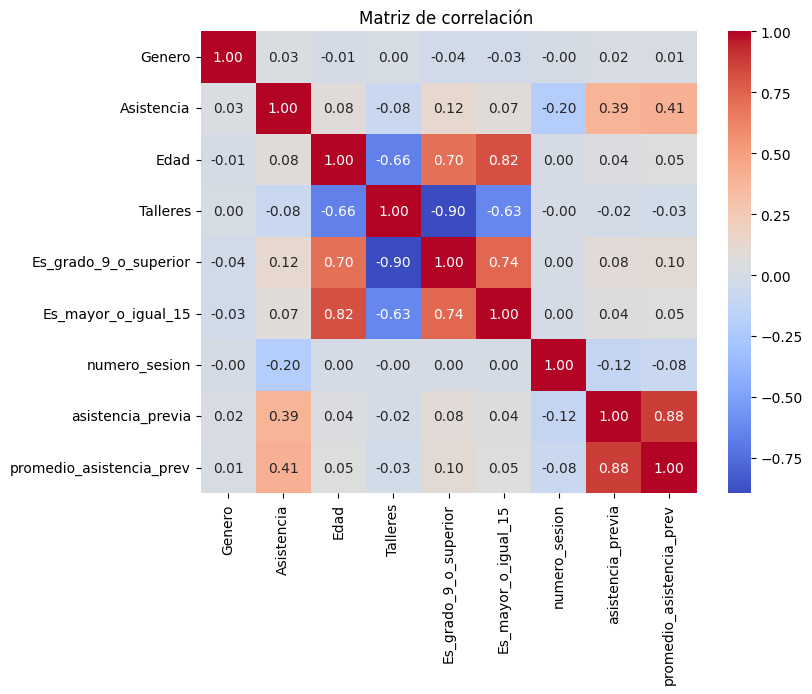

In [23]:
# Crear matriz de correlación
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación ')
plt.show()

**De la matriz de correlación podemos destacar lo siguiente:**

* Variables con correlación significativa con nuestra variable predecir son: numero_sesion con -0.20, asistencia_previa con 0.39 y promedio_asistencia_prev con 0.41. Lo cual indica que no estan altamente relacionadas entre si evitando redudancia de datos, ideal para nuesra predición.

* Varibales como Edad, talleres, Es_grado_superior y Es_mayor_o_igual están fuertemente correlacionadas entre si, indicando compartamientos de variabilidad similares. De lo cual podemos indicar que usar estas variables para nuestro modelo no sería lo ideal porque estaríamos alimentando el modelo con el mismo comportamiento. Para nuestro modelo se tomo la variable Es_grado_9_o_superior, ya que es una variable relevante de transición estudiantil y relevante en la asistencia.

# **Implementación modelo de Machine Learning**

In [24]:
#Loading more required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [25]:
df=df[["Es_grado_9_o_superior","Talleres","promedio_asistencia_prev","numero_sesion","Asistencia"]].copy()

In [26]:
df_cleaned = df.dropna()
y = df_cleaned["Asistencia"]
X = df_cleaned.drop(["Asistencia"], axis=1)

In [27]:
# Split the data in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [28]:
#Balance data

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Aplicar SMOTE a los datos de entrenamiento para balancearlos
# El método `fit_resample()` se encarga de todo el proceso
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [29]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_bal, y_train_bal)


LogisticRegression(max_iter=1000, random_state=42)

In [30]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

models = {
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Logistic Regression": y_pred_lr
}

for name, y_pred in models.items():
    print(f"=== {name} ===")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

=== Decision Tree ===
Accuracy: 0.77
Confusion Matrix:
 [[117  60]
 [155 602]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.66      0.52       177
           1       0.91      0.80      0.85       757

    accuracy                           0.77       934
   macro avg       0.67      0.73      0.68       934
weighted avg       0.82      0.77      0.79       934

--------------------------------------------------
=== Random Forest ===
Accuracy: 0.77
Confusion Matrix:
 [[117  60]
 [155 602]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.66      0.52       177
           1       0.91      0.80      0.85       757

    accuracy                           0.77       934
   macro avg       0.67      0.73      0.68       934
weighted avg       0.82      0.77      0.79       934

--------------------------------------------------
=== Logistic Regression ===
Accuracy: 